In [1]:
import os

import pandas as pd
import numpy as np

from keras import layers, models, callbacks
from keras.preprocessing import image
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [2]:
samuel_images_validation_dir = 'data/samuel_images_validation'
samuel_images_train_dir = 'data/samuel_images_train'

In [3]:
model = models.Sequential()
model.add(layers.SeparableConv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 222, 222, 32)      155       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 109, 109, 64)      2400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 52, 52, 128)       8896      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 24, 24, 128)       17664     
__________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        samuel_images_train_dir,
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        samuel_images_validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1294 images belonging to 2 classes.
Found 647 images belonging to 2 classes.


In [7]:
def fit_model():
    checkpointer = callbacks.ModelCheckpoint(filepath='data/model_checkpoints/models.{epoch:02d}.h5', verbose=1, period=10)

    return model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=600,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks=[checkpointer])

In [8]:
%time history = fit_model()

Epoch 1/600
100/100 [==============================] - 51s 506ms/step - loss: 0.6908 - acc: 0.5482 - val_loss: 0.6756 - val_acc: 0.6260
Epoch 2/600
100/100 [==============================] - 46s 460ms/step - loss: 0.6896 - acc: 0.5429 - val_loss: 0.6719 - val_acc: 0.6260
Epoch 3/600
100/100 [==============================] - 46s 459ms/step - loss: 0.6889 - acc: 0.5463 - val_loss: 0.6723 - val_acc: 0.6260
Epoch 4/600
100/100 [==============================] - 48s 481ms/step - loss: 0.6887 - acc: 0.5422 - val_loss: 0.6692 - val_acc: 0.6260
Epoch 5/600
100/100 [==============================] - 46s 459ms/step - loss: 0.6858 - acc: 0.5514 - val_loss: 0.6632 - val_acc: 0.6260
Epoch 6/600
100/100 [==============================] - 46s 462ms/step - loss: 0.6843 - acc: 0.5410 - val_loss: 0.6560 - val_acc: 0.6275
Epoch 7/600
100/100 [==============================] - 45s 453ms/step - loss: 0.6763 - acc: 0.5562 - val_loss: 0.6390 - val_acc: 0.6600
Epoch 8/600
100/100 [===========================

100/100 [==============================] - 46s 460ms/step - loss: 0.6168 - acc: 0.6367 - val_loss: 0.5968 - val_acc: 0.6569
Epoch 59/600
100/100 [==============================] - 47s 468ms/step - loss: 0.6297 - acc: 0.6391 - val_loss: 0.5820 - val_acc: 0.6785
Epoch 60/600
100/100 [==============================] - 48s 484ms/step - loss: 0.6116 - acc: 0.6514 - val_loss: 0.5769 - val_acc: 0.6909

Epoch 00060: saving model to data/model_checkpoints/models.60.h5
Epoch 61/600
100/100 [==============================] - 47s 470ms/step - loss: 0.6192 - acc: 0.6456 - val_loss: 0.5644 - val_acc: 0.7017
Epoch 62/600
100/100 [==============================] - 48s 481ms/step - loss: 0.6116 - acc: 0.6551 - val_loss: 0.5778 - val_acc: 0.6832
Epoch 63/600
100/100 [==============================] - 46s 461ms/step - loss: 0.6177 - acc: 0.6499 - val_loss: 0.5701 - val_acc: 0.6924
Epoch 64/600
100/100 [==============================] - 52s 518ms/step - loss: 0.6143 - acc: 0.6550 - val_loss: 0.5717 - val_

Epoch 115/600
100/100 [==============================] - 47s 467ms/step - loss: 0.5630 - acc: 0.7015 - val_loss: 0.5446 - val_acc: 0.7156
Epoch 116/600
100/100 [==============================] - 52s 516ms/step - loss: 0.5737 - acc: 0.6953 - val_loss: 0.5370 - val_acc: 0.7172
Epoch 117/600
100/100 [==============================] - 46s 456ms/step - loss: 0.5705 - acc: 0.7090 - val_loss: 0.5111 - val_acc: 0.7604
Epoch 118/600
100/100 [==============================] - 45s 448ms/step - loss: 0.5633 - acc: 0.7093 - val_loss: 0.5308 - val_acc: 0.7342
Epoch 119/600
100/100 [==============================] - 47s 471ms/step - loss: 0.5752 - acc: 0.6947 - val_loss: 0.5195 - val_acc: 0.7372
Epoch 120/600
100/100 [==============================] - 48s 479ms/step - loss: 0.5679 - acc: 0.6970 - val_loss: 0.5512 - val_acc: 0.7125

Epoch 00120: saving model to data/model_checkpoints/models.120.h5
Epoch 121/600
100/100 [==============================] - 45s 450ms/step - loss: 0.5643 - acc: 0.7169 - va

100/100 [==============================] - 47s 466ms/step - loss: 0.5302 - acc: 0.7376 - val_loss: 0.5184 - val_acc: 0.7388
Epoch 172/600
100/100 [==============================] - 46s 459ms/step - loss: 0.5253 - acc: 0.7301 - val_loss: 0.5056 - val_acc: 0.7635
Epoch 173/600
100/100 [==============================] - 46s 457ms/step - loss: 0.5356 - acc: 0.7275 - val_loss: 0.5358 - val_acc: 0.7202
Epoch 174/600
100/100 [==============================] - 46s 457ms/step - loss: 0.5299 - acc: 0.7305 - val_loss: 0.5454 - val_acc: 0.7063
Epoch 175/600
100/100 [==============================] - 47s 466ms/step - loss: 0.5209 - acc: 0.7412 - val_loss: 0.5470 - val_acc: 0.7048
Epoch 176/600
100/100 [==============================] - 49s 487ms/step - loss: 0.5302 - acc: 0.7305 - val_loss: 0.5215 - val_acc: 0.7342
Epoch 177/600
100/100 [==============================] - 45s 454ms/step - loss: 0.5250 - acc: 0.7351 - val_loss: 0.6433 - val_acc: 0.6522
Epoch 178/600
100/100 [=========================

100/100 [==============================] - 46s 465ms/step - loss: 0.4714 - acc: 0.7759 - val_loss: 0.5044 - val_acc: 0.7589
Epoch 229/600
100/100 [==============================] - 47s 474ms/step - loss: 0.4900 - acc: 0.7627 - val_loss: 0.6209 - val_acc: 0.6862
Epoch 230/600
100/100 [==============================] - 46s 460ms/step - loss: 0.4965 - acc: 0.7633 - val_loss: 0.5169 - val_acc: 0.7527

Epoch 00230: saving model to data/model_checkpoints/models.230.h5
Epoch 231/600
100/100 [==============================] - 47s 471ms/step - loss: 0.4745 - acc: 0.7716 - val_loss: 0.5180 - val_acc: 0.7357
Epoch 232/600
100/100 [==============================] - 46s 463ms/step - loss: 0.4911 - acc: 0.7672 - val_loss: 0.5445 - val_acc: 0.7110
Epoch 233/600
100/100 [==============================] - 49s 488ms/step - loss: 0.4933 - acc: 0.7621 - val_loss: 0.5313 - val_acc: 0.7280
Epoch 234/600
100/100 [==============================] - 48s 482ms/step - loss: 0.4951 - acc: 0.7593 - val_loss: 0.5469

100/100 [==============================] - 47s 468ms/step - loss: 0.4633 - acc: 0.7758 - val_loss: 0.5216 - val_acc: 0.7403
Epoch 285/600
100/100 [==============================] - 49s 487ms/step - loss: 0.4373 - acc: 0.7980 - val_loss: 0.5303 - val_acc: 0.7682
Epoch 286/600
100/100 [==============================] - 45s 453ms/step - loss: 0.4487 - acc: 0.7956 - val_loss: 0.6121 - val_acc: 0.6754
Epoch 287/600
100/100 [==============================] - 47s 470ms/step - loss: 0.4410 - acc: 0.7909 - val_loss: 0.5627 - val_acc: 0.7357
Epoch 288/600
100/100 [==============================] - 45s 454ms/step - loss: 0.4556 - acc: 0.7847 - val_loss: 0.5452 - val_acc: 0.7682
Epoch 289/600
100/100 [==============================] - 46s 462ms/step - loss: 0.4623 - acc: 0.7866 - val_loss: 0.6555 - val_acc: 0.6584
Epoch 290/600
100/100 [==============================] - 46s 458ms/step - loss: 0.4400 - acc: 0.8089 - val_loss: 0.5178 - val_acc: 0.7697

Epoch 00290: saving model to data/model_checkpo

100/100 [==============================] - 48s 483ms/step - loss: 0.4284 - acc: 0.7981 - val_loss: 0.6356 - val_acc: 0.7326
Epoch 342/600
100/100 [==============================] - 46s 462ms/step - loss: 0.4124 - acc: 0.8056 - val_loss: 0.6208 - val_acc: 0.6940
Epoch 343/600
100/100 [==============================] - 46s 461ms/step - loss: 0.4208 - acc: 0.8102 - val_loss: 0.6257 - val_acc: 0.7264
Epoch 344/600
100/100 [==============================] - 46s 459ms/step - loss: 0.4235 - acc: 0.8112 - val_loss: 0.5428 - val_acc: 0.7496
Epoch 345/600
100/100 [==============================] - 46s 464ms/step - loss: 0.4038 - acc: 0.8179 - val_loss: 0.6703 - val_acc: 0.6553
Epoch 346/600
100/100 [==============================] - 48s 478ms/step - loss: 0.4398 - acc: 0.8059 - val_loss: 0.5638 - val_acc: 0.7589
Epoch 347/600
100/100 [==============================] - 46s 463ms/step - loss: 0.4104 - acc: 0.8080 - val_loss: 0.6732 - val_acc: 0.7527
Epoch 348/600
100/100 [=========================

100/100 [==============================] - 48s 483ms/step - loss: 0.3807 - acc: 0.8304 - val_loss: 0.6082 - val_acc: 0.7620
Epoch 399/600
100/100 [==============================] - 46s 458ms/step - loss: 0.3641 - acc: 0.8460 - val_loss: 0.5909 - val_acc: 0.7573
Epoch 400/600
100/100 [==============================] - 50s 499ms/step - loss: 0.3797 - acc: 0.8239 - val_loss: 0.5499 - val_acc: 0.7713

Epoch 00400: saving model to data/model_checkpoints/models.400.h5
Epoch 401/600
100/100 [==============================] - 46s 456ms/step - loss: 0.3863 - acc: 0.8276 - val_loss: 0.5855 - val_acc: 0.7589
Epoch 402/600
100/100 [==============================] - 51s 507ms/step - loss: 0.3883 - acc: 0.8224 - val_loss: 0.6499 - val_acc: 0.7295
Epoch 403/600
100/100 [==============================] - 48s 479ms/step - loss: 0.3705 - acc: 0.8343 - val_loss: 0.5754 - val_acc: 0.7573
Epoch 404/600
100/100 [==============================] - 46s 456ms/step - loss: 0.3535 - acc: 0.8416 - val_loss: 0.6324

100/100 [==============================] - 49s 485ms/step - loss: 0.3463 - acc: 0.8467 - val_loss: 0.6373 - val_acc: 0.7388
Epoch 455/600
100/100 [==============================] - 46s 455ms/step - loss: 0.3361 - acc: 0.8539 - val_loss: 0.7489 - val_acc: 0.7125
Epoch 456/600
100/100 [==============================] - 45s 452ms/step - loss: 0.3661 - acc: 0.8429 - val_loss: 0.6522 - val_acc: 0.7573
Epoch 457/600
100/100 [==============================] - 47s 470ms/step - loss: 0.3434 - acc: 0.8511 - val_loss: 0.6436 - val_acc: 0.7682
Epoch 458/600
100/100 [==============================] - 46s 462ms/step - loss: 0.3492 - acc: 0.8490 - val_loss: 0.6854 - val_acc: 0.7450
Epoch 459/600
100/100 [==============================] - 46s 459ms/step - loss: 0.3449 - acc: 0.8464 - val_loss: 0.6188 - val_acc: 0.7790
Epoch 460/600
100/100 [==============================] - 47s 474ms/step - loss: 0.3578 - acc: 0.8536 - val_loss: 0.6035 - val_acc: 0.7558

Epoch 00460: saving model to data/model_checkpo

100/100 [==============================] - 46s 461ms/step - loss: 0.3234 - acc: 0.8571 - val_loss: 0.6560 - val_acc: 0.7713
Epoch 512/600
100/100 [==============================] - 46s 459ms/step - loss: 0.3003 - acc: 0.8800 - val_loss: 0.7273 - val_acc: 0.7496
Epoch 513/600
100/100 [==============================] - 45s 455ms/step - loss: 0.3001 - acc: 0.8754 - val_loss: 0.7070 - val_acc: 0.7589
Epoch 514/600
100/100 [==============================] - 46s 460ms/step - loss: 0.3213 - acc: 0.8571 - val_loss: 0.7034 - val_acc: 0.7125
Epoch 515/600
100/100 [==============================] - 47s 474ms/step - loss: 0.3155 - acc: 0.8656 - val_loss: 0.6440 - val_acc: 0.7573
Epoch 516/600
100/100 [==============================] - 48s 483ms/step - loss: 0.3239 - acc: 0.8674 - val_loss: 0.7637 - val_acc: 0.7110
Epoch 517/600
100/100 [==============================] - 48s 477ms/step - loss: 0.3169 - acc: 0.8641 - val_loss: 0.7938 - val_acc: 0.6924
Epoch 518/600
100/100 [=========================

100/100 [==============================] - 48s 479ms/step - loss: 0.2794 - acc: 0.8816 - val_loss: 0.7304 - val_acc: 0.7759
Epoch 569/600
100/100 [==============================] - 47s 475ms/step - loss: 0.2863 - acc: 0.8788 - val_loss: 0.7283 - val_acc: 0.7311
Epoch 570/600
100/100 [==============================] - 47s 466ms/step - loss: 0.2835 - acc: 0.8799 - val_loss: 0.8073 - val_acc: 0.7172

Epoch 00570: saving model to data/model_checkpoints/models.570.h5
Epoch 571/600
100/100 [==============================] - 48s 479ms/step - loss: 0.2993 - acc: 0.8705 - val_loss: 0.7971 - val_acc: 0.7682
Epoch 572/600
100/100 [==============================] - 45s 453ms/step - loss: 0.2666 - acc: 0.8911 - val_loss: 0.7403 - val_acc: 0.7666
Epoch 573/600
100/100 [==============================] - 46s 459ms/step - loss: 0.3090 - acc: 0.8684 - val_loss: 0.6759 - val_acc: 0.7450
Epoch 574/600
100/100 [==============================] - 47s 467ms/step - loss: 0.2936 - acc: 0.8709 - val_loss: 0.7576

### Save Model

In [9]:
model_file = 'data/samuel_images_model_{}.h5'.format(time.time())
model.save(model_file)

print('saved to {}'.format(model_file))

saved to data/samuel_images_model_1533475281.794659.h5


### Plot The ROC

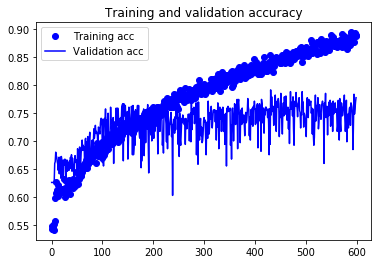

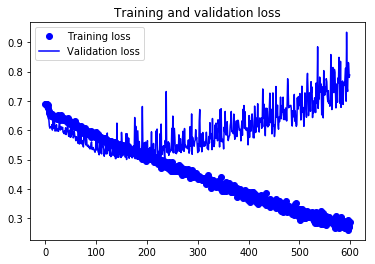

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Validate model

In [11]:
samuel_images_test_dir = 'data/samuel_images_test'

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        samuel_images_test_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 302 images belonging to 2 classes.


In [13]:
loss, acc = model.evaluate_generator(test_generator)
print('loss={}, acc={}'.format(loss, acc))

loss=1.7429904448275535, acc=0.6490066193586943


### Display predicted items

In [14]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
predictions = model.predict_generator(test_generator)

In [24]:
test_image_results = pd.DataFrame({
    'prediction': predictions.flatten(),
    'filename': test_generator.filenames
}) \
.sort_values('prediction', ascending=False) \
.head(n=10)

In [25]:
test_image_results

,filename,prediction
23,notSamuel/562.jpg,1.000000
3,notSamuel/1073.jpg,1.000000
217,samuel/00000076.jpg,1.000000
79,notSamuel/698.jpg,0.999998
135,notSamuel/855.jpg,0.999992
266,samuel/00000165.jpg,0.999956
171,samuel/00000003.jpg,0.999953
49,notSamuel/621.jpg,0.999952
81,notSamuel/70.jpg,0.999831
22,notSamuel/55.jpg,0.999775


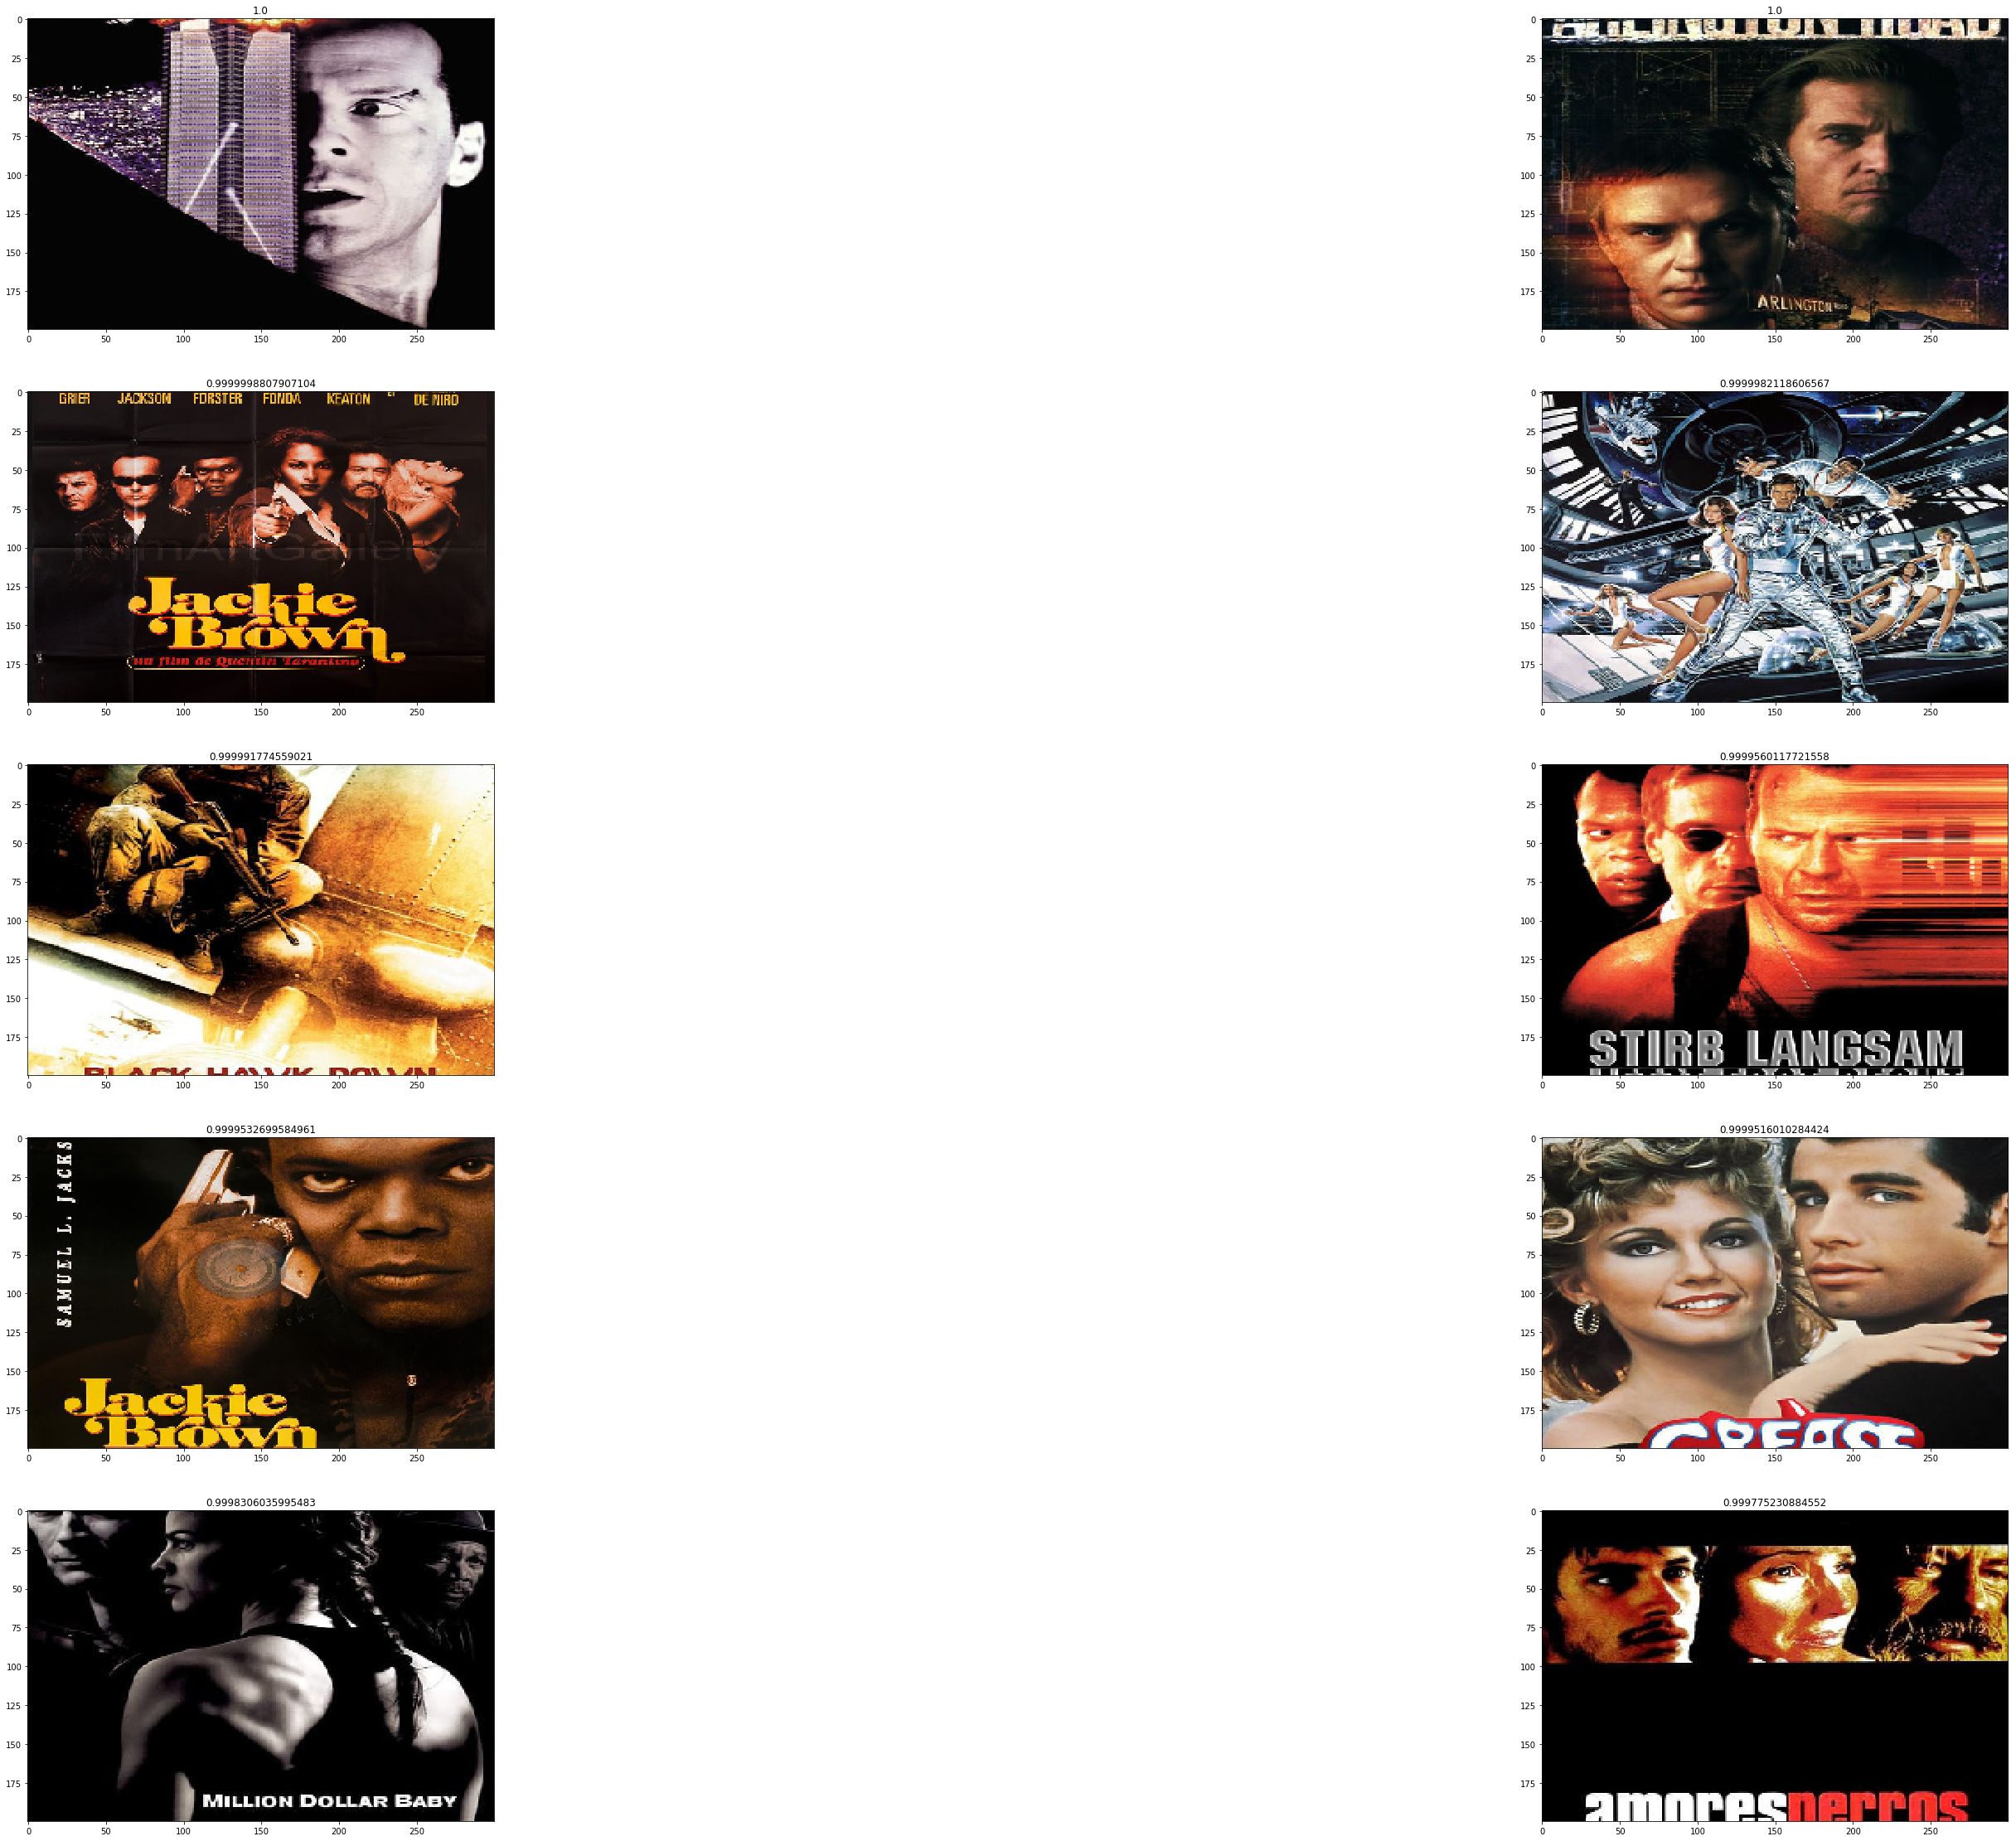

In [26]:
fnames = [os.path.join(samuel_images_test_dir, fname) for fname in test_image_results.filename]

imgs = [image.load_img(fname, target_size=(200,300)) for fname in fnames]
show_images(imgs, 5, test_image_results.prediction)

In [19]:
# Use Grid Search to use all cores https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
